In [47]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad_suelo = ctrl.Antecedent(np.arange(0, 1024, 1), 'humedad_suelo')
tiempo_riego = ctrl.Consequent(np.arange(0, 18, 1), 'tiempo_riego')

# Auto-membership function population is possible with .automf(3, 5, or 7)
humedad_suelo['seco'] = fuzz.trimf(humedad_suelo.universe, [0, 100, 200])
humedad_suelo['semi_seco'] = fuzz.trimf(humedad_suelo.universe, [120, 310, 500])
humedad_suelo['humedo'] = fuzz.trimf(humedad_suelo.universe, [450, 572, 694])
humedad_suelo['semi_humedo'] = fuzz.trimf(humedad_suelo.universe, [658, 725, 792])
humedad_suelo['encharcado'] = fuzz.trimf(humedad_suelo.universe, [750, 825, 900])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tiempo_riego['nada'] = fuzz.trimf(tiempo_riego.universe, [0, 0, 0])
tiempo_riego['poco'] = fuzz.trimf(tiempo_riego.universe, [0, 2 , 4])
tiempo_riego['medio'] = fuzz.trimf(tiempo_riego.universe, [3, 6, 9])
tiempo_riego['bastante'] = fuzz.trimf(tiempo_riego.universe, [7, 9, 12])
tiempo_riego['mucho'] = fuzz.trapmf(tiempo_riego.universe, [10, 13, 17, 17])

C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


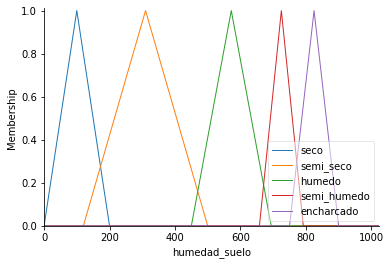

In [48]:
# You can see how these look with .view()
humedad_suelo.view()

C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


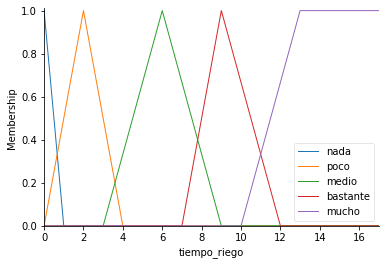

In [49]:
tiempo_riego.view()

IF humedad_suelo[encharcado] THEN tiempo_riego[nada]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

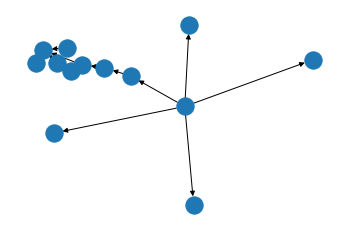

In [50]:
rule1 = ctrl.Rule(humedad_suelo['encharcado'], tiempo_riego['nada'])
rule2 = ctrl.Rule(humedad_suelo['semi_humedo'], tiempo_riego['poco'])
rule3 = ctrl.Rule(humedad_suelo['humedo'], tiempo_riego['medio'])
rule4 = ctrl.Rule(humedad_suelo['semi_seco'], tiempo_riego['bastante'])
rule5 = ctrl.Rule(humedad_suelo['seco'], tiempo_riego['mucho'])

print(rule1)

rule1.view()

## Control System Creation and Simulation.

Now that we have our rules defined, we can simply create a control system via:

In [51]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])

In order to simulate this control system, we will create a ControlSystemSimulation.
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [52]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [55]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['humedad_suelo'] = 150

# Crunch the numbers
tipping.compute()

Once computed, we can view the result as well as visualize it.

13.134792023190025


C:\casa-ortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


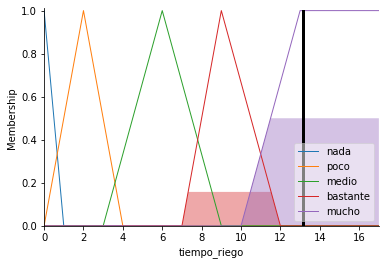

In [56]:
print (tipping.output['tiempo_riego'])
tiempo_riego.view(sim=tipping)